In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Loading the dataset

In [2]:
dataset = sns.load_dataset("diamonds")
dataset.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [4]:
dataset.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

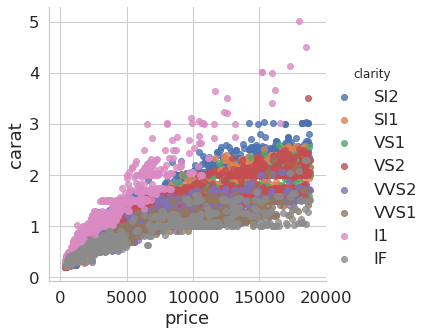

In [73]:
sns.lmplot(y="carat", x="price", hue="clarity", data= dataset, fit_reg= False)


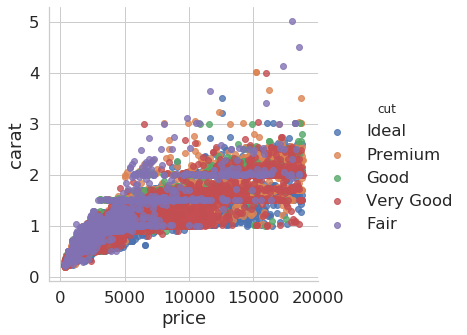

In [72]:
sns.lmplot(y="carat", x="price", hue="cut", data= dataset, fit_reg= False)


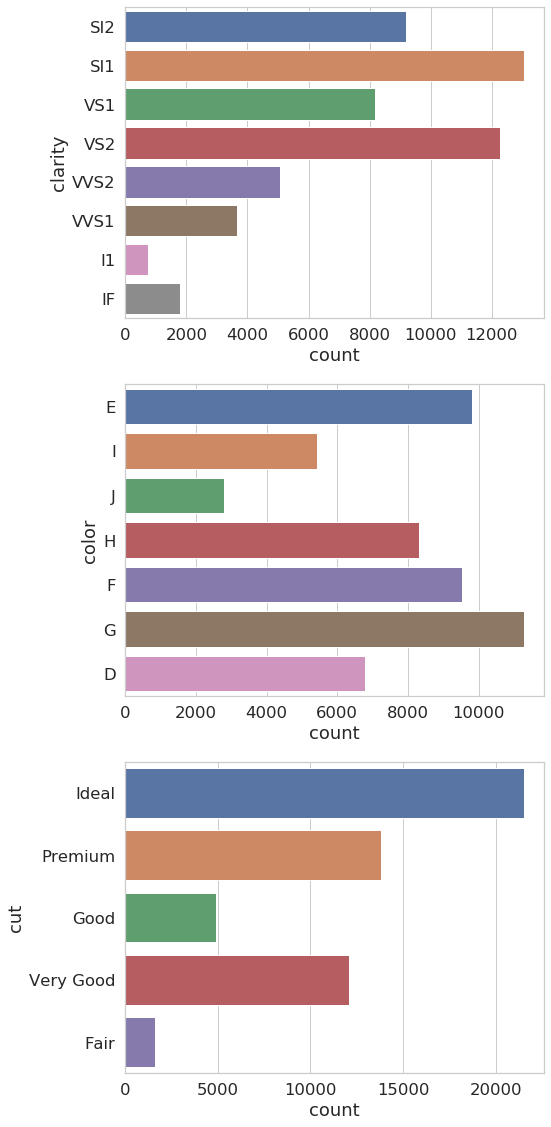

In [69]:
sns.set(style = "whitegrid", font_scale = 1.5)

f, axes = plt.subplots(3, figsize = (8,16))

sns.countplot(y = "clarity", data = dataset, ax = axes[0])

sns.countplot(y = "color", data = dataset, ax = axes[1])

sns.countplot(y = "cut", data = dataset, ax = axes[2])

plt.tight_layout()

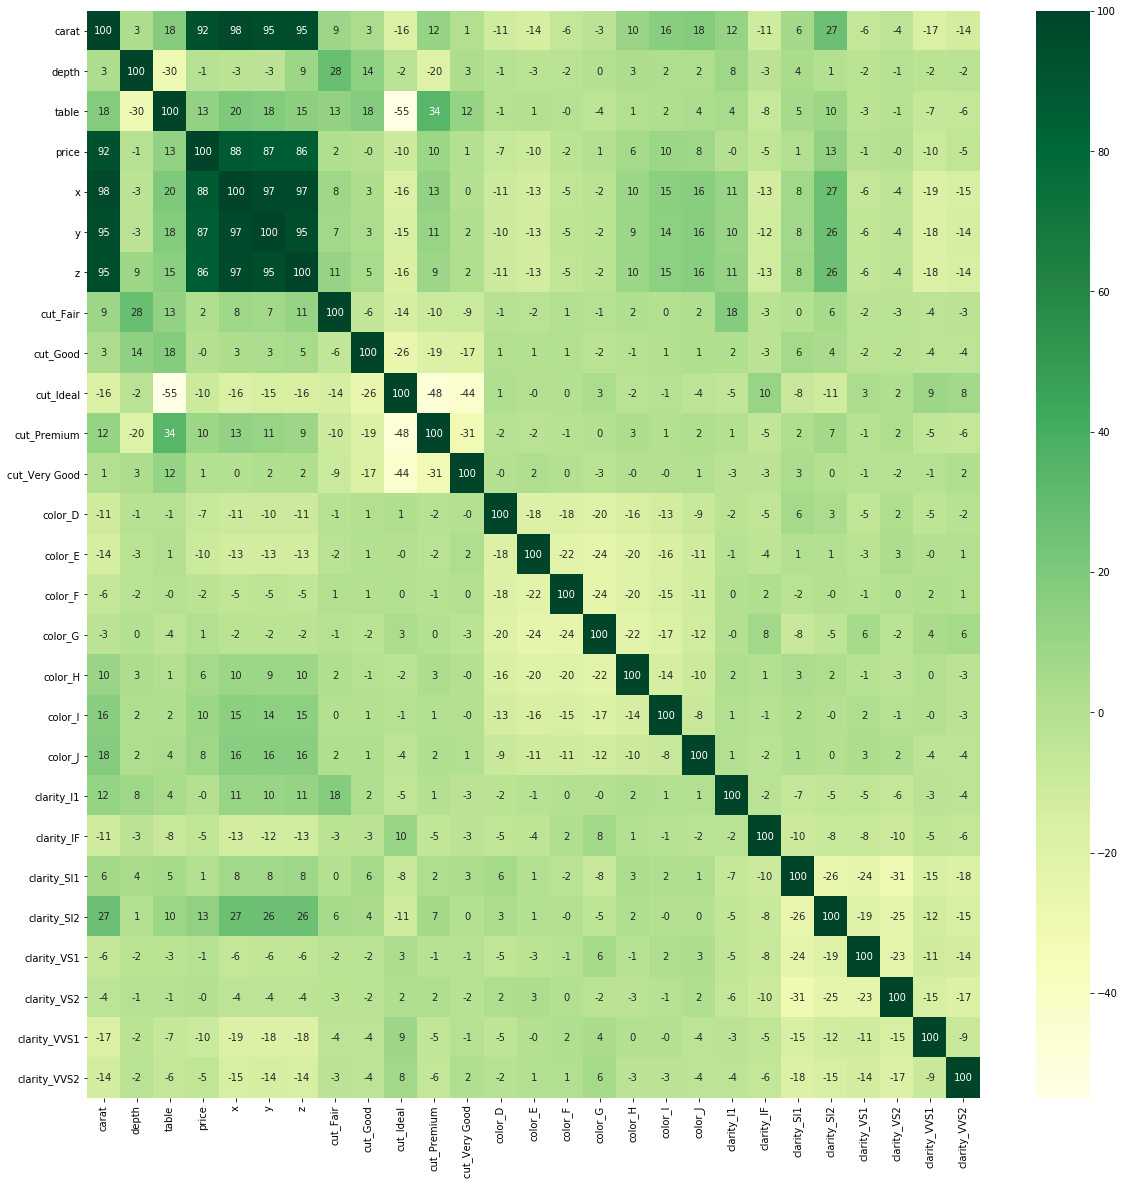

In [8]:
new_df = pd.get_dummies(dataset)
plt.figure(figsize=(20, 20))
corr = new_df.corr()
sns.heatmap(corr*100, cmap="YlGn", annot= True, fmt=".0f")

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cut = dataset.iloc[:,1:2]
color = dataset.iloc[:,2:3]
clarity = dataset.iloc[:,3:4]
cut = ohe.fit_transform(cut).toarray()
color = ohe.fit_transform(color).toarray()
clarity = ohe.fit_transform(clarity).toarray()

In [15]:
dataset.drop(columns = ['cut', 'color', 'clarity'], inplace = True)

In [20]:
cut = pd.DataFrame(cut)
color = pd.DataFrame(color)
clarity = pd.DataFrame(clarity)

In [21]:
dataset = pd.concat([dataset, cut, color, clarity], axis = 1)

In [27]:
X = dataset.drop(columns = 'price').values
Y = dataset.iloc[:,3:4].values

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [48]:
import statsmodels.api as sm 

X_l = dataset.iloc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
].values
r_ols = sm.OLS(endog = dataset.iloc[:,-1:], exog =X_l).fit()

print(r_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      7   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.772e+28
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        14:47:47   Log-Likelihood:             1.5628e+06
No. Observations:               53940   AIC:                        -3.125e+06
Df Residuals:                   53915   BIC:                        -3.125e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.533e-15   3.85e-15      0.399      0.6

**Significance Level: 0.05
we do not screen because there is no column exceeding this value.**

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred_linReg = lin_reg.predict(x_test)

print(r2_score(y_test, y_pred_linReg))

0.9212394719973421


In [47]:
print('coef', lin_reg.coef_,'\n\n')

print('intercept', lin_reg.intercept_)

coef [[ 1.11984810e+04 -6.73444109e+01 -2.83011978e+01 -9.76563816e+02
   9.93243397e-01 -4.74739183e+01 -5.61131853e+02 -1.11233030e+01
   2.50500684e+02  1.77387241e+02  1.44367231e+02  8.08108887e+02
   6.16947037e+02  5.59860549e+02  3.51486870e+02 -1.41294870e+02
  -6.42240098e+02 -1.55286838e+03 -3.81105185e+03  1.50989654e+03
  -1.44109553e+02 -1.11455603e+03  7.70445750e+02  4.53044724e+02
   1.19714224e+03  1.13918818e+03]] 


intercept [5978.1727661]


The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix  have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

# Polynomial Regression

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1) 
x_poly = poly_reg.fit_transform(x_train) 
x_poly2 = poly_reg.fit_transform(x_test) 
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)
y_pred_poly = lin_reg.predict(x_poly2)

print(r2_score(y_test, y_pred_poly))

0.9212394719973421


# Support Vector Regression

In [40]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'linear')
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)

print(r2_score(y_test, y_pred_svr))

0.8818127054449201


# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train,y_train)
y_pred_dt = dt_reg.predict(X_test)

print(r2_score(y_test, y_pred_dt))

0.9641072517956453


# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print(r2_score(y_test, y_pred_rf))

0.9788948586336134


# XGBRegressor

In [45]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 100)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

print(r2_score(y_test, y_pred_xgb))

0.9806152259515413
